# LAYOUT ANALYSIS
## Bottom-Up methods
### MST

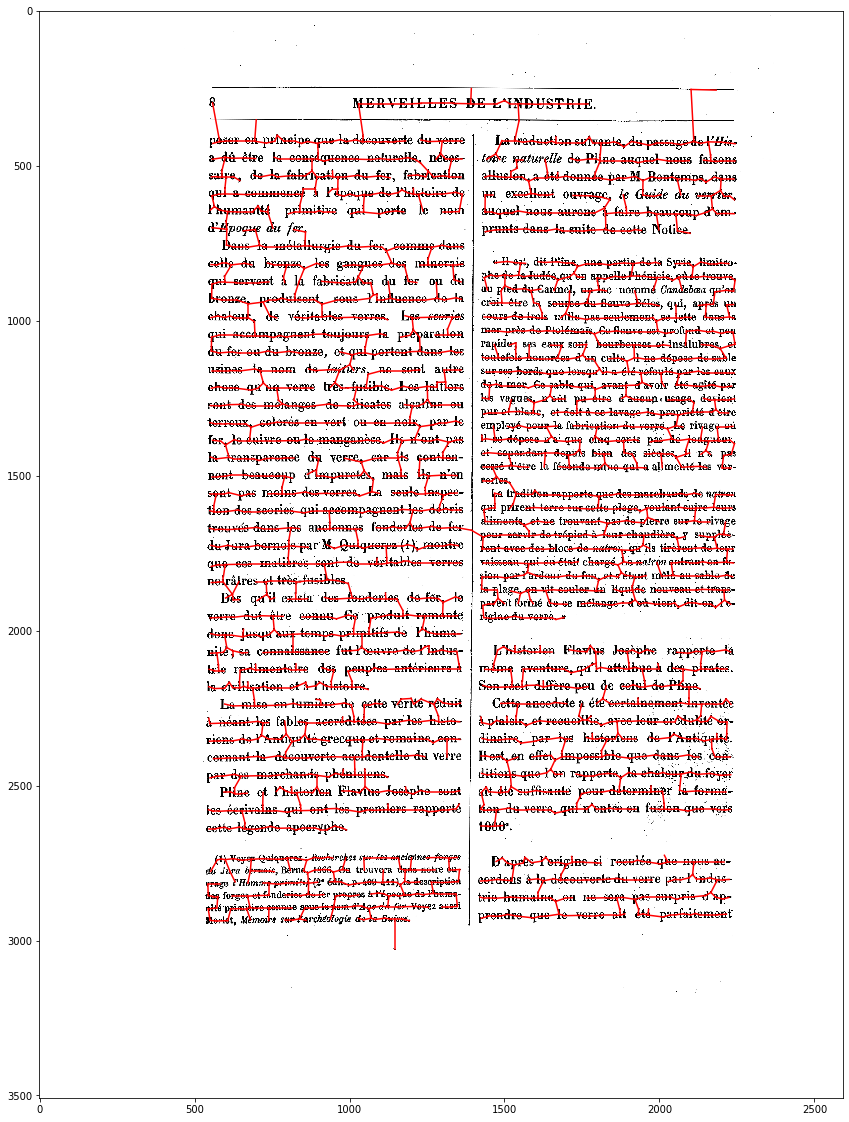

In [19]:
from Progetto import *
import cv2
from matplotlib import pyplot as plt

img_name='prova2.tif'
path='images/'+img_name
img = cv2.imread(path)
img_centroids=img.copy()

img_bin = binarization('otsu', img)
img_bin=removeFiguresOrSpots(img_bin,'spots')
img2=img_bin.copy()

printContours(img2,img2,1)
points = findCentroids(img2,img_centroids)
_,mst_edges=minimumSpanningTreeEdges(points,5)
points=np.int32(points)
plotEdges(img,mst_edges,points)


### DocStrum

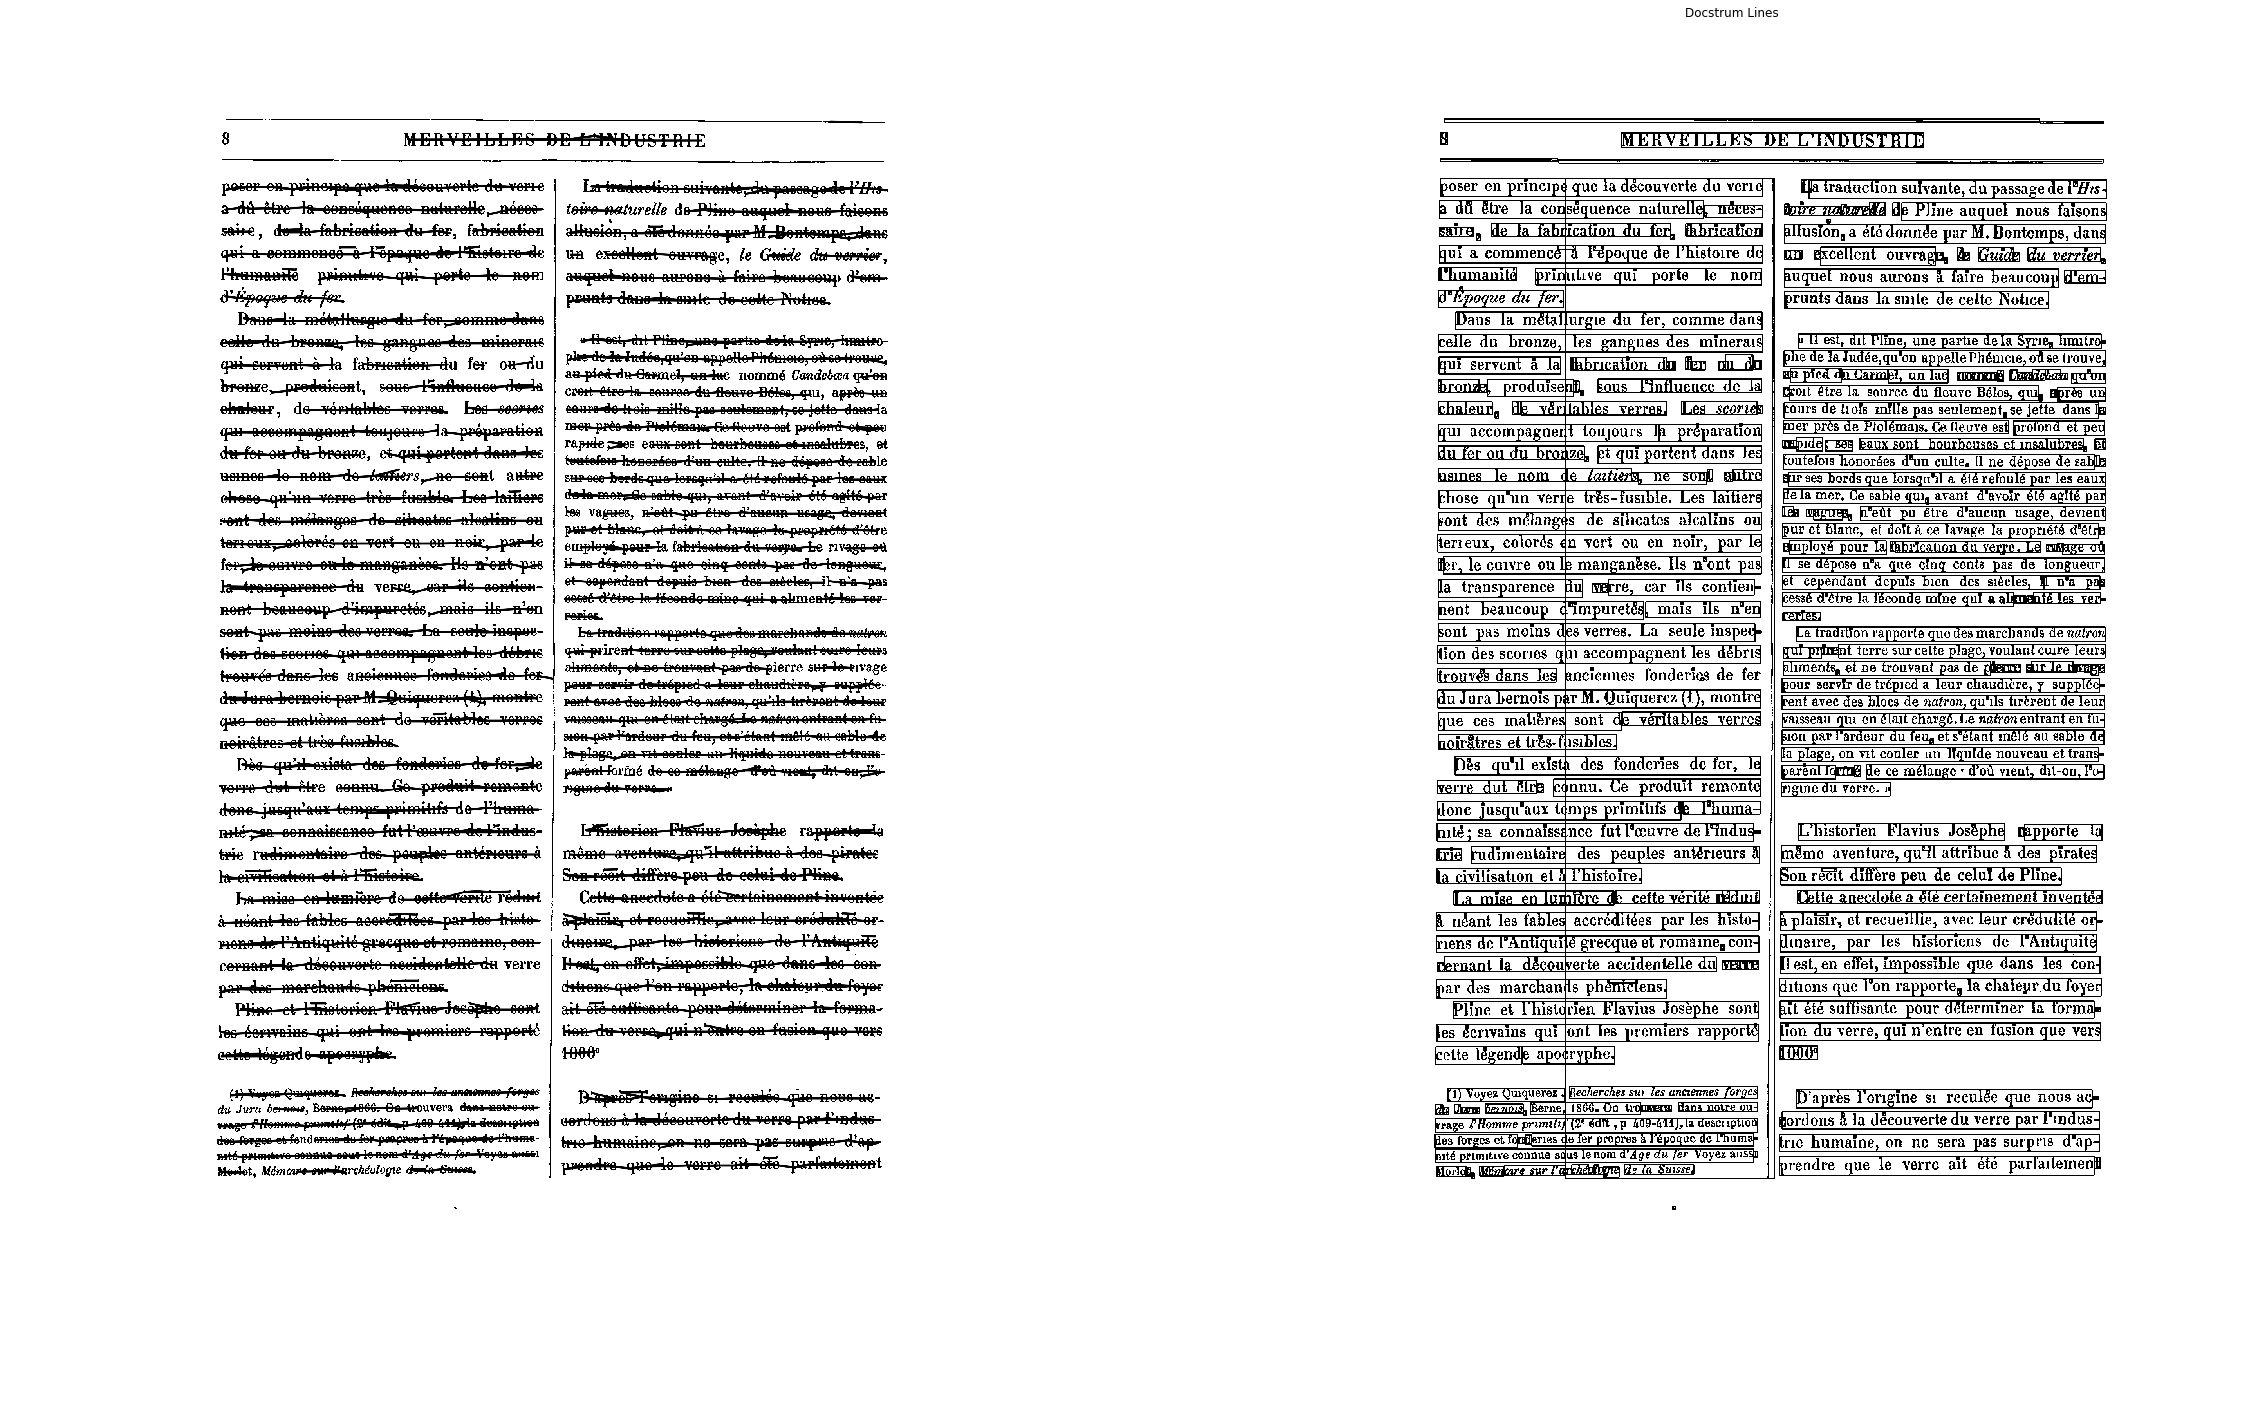

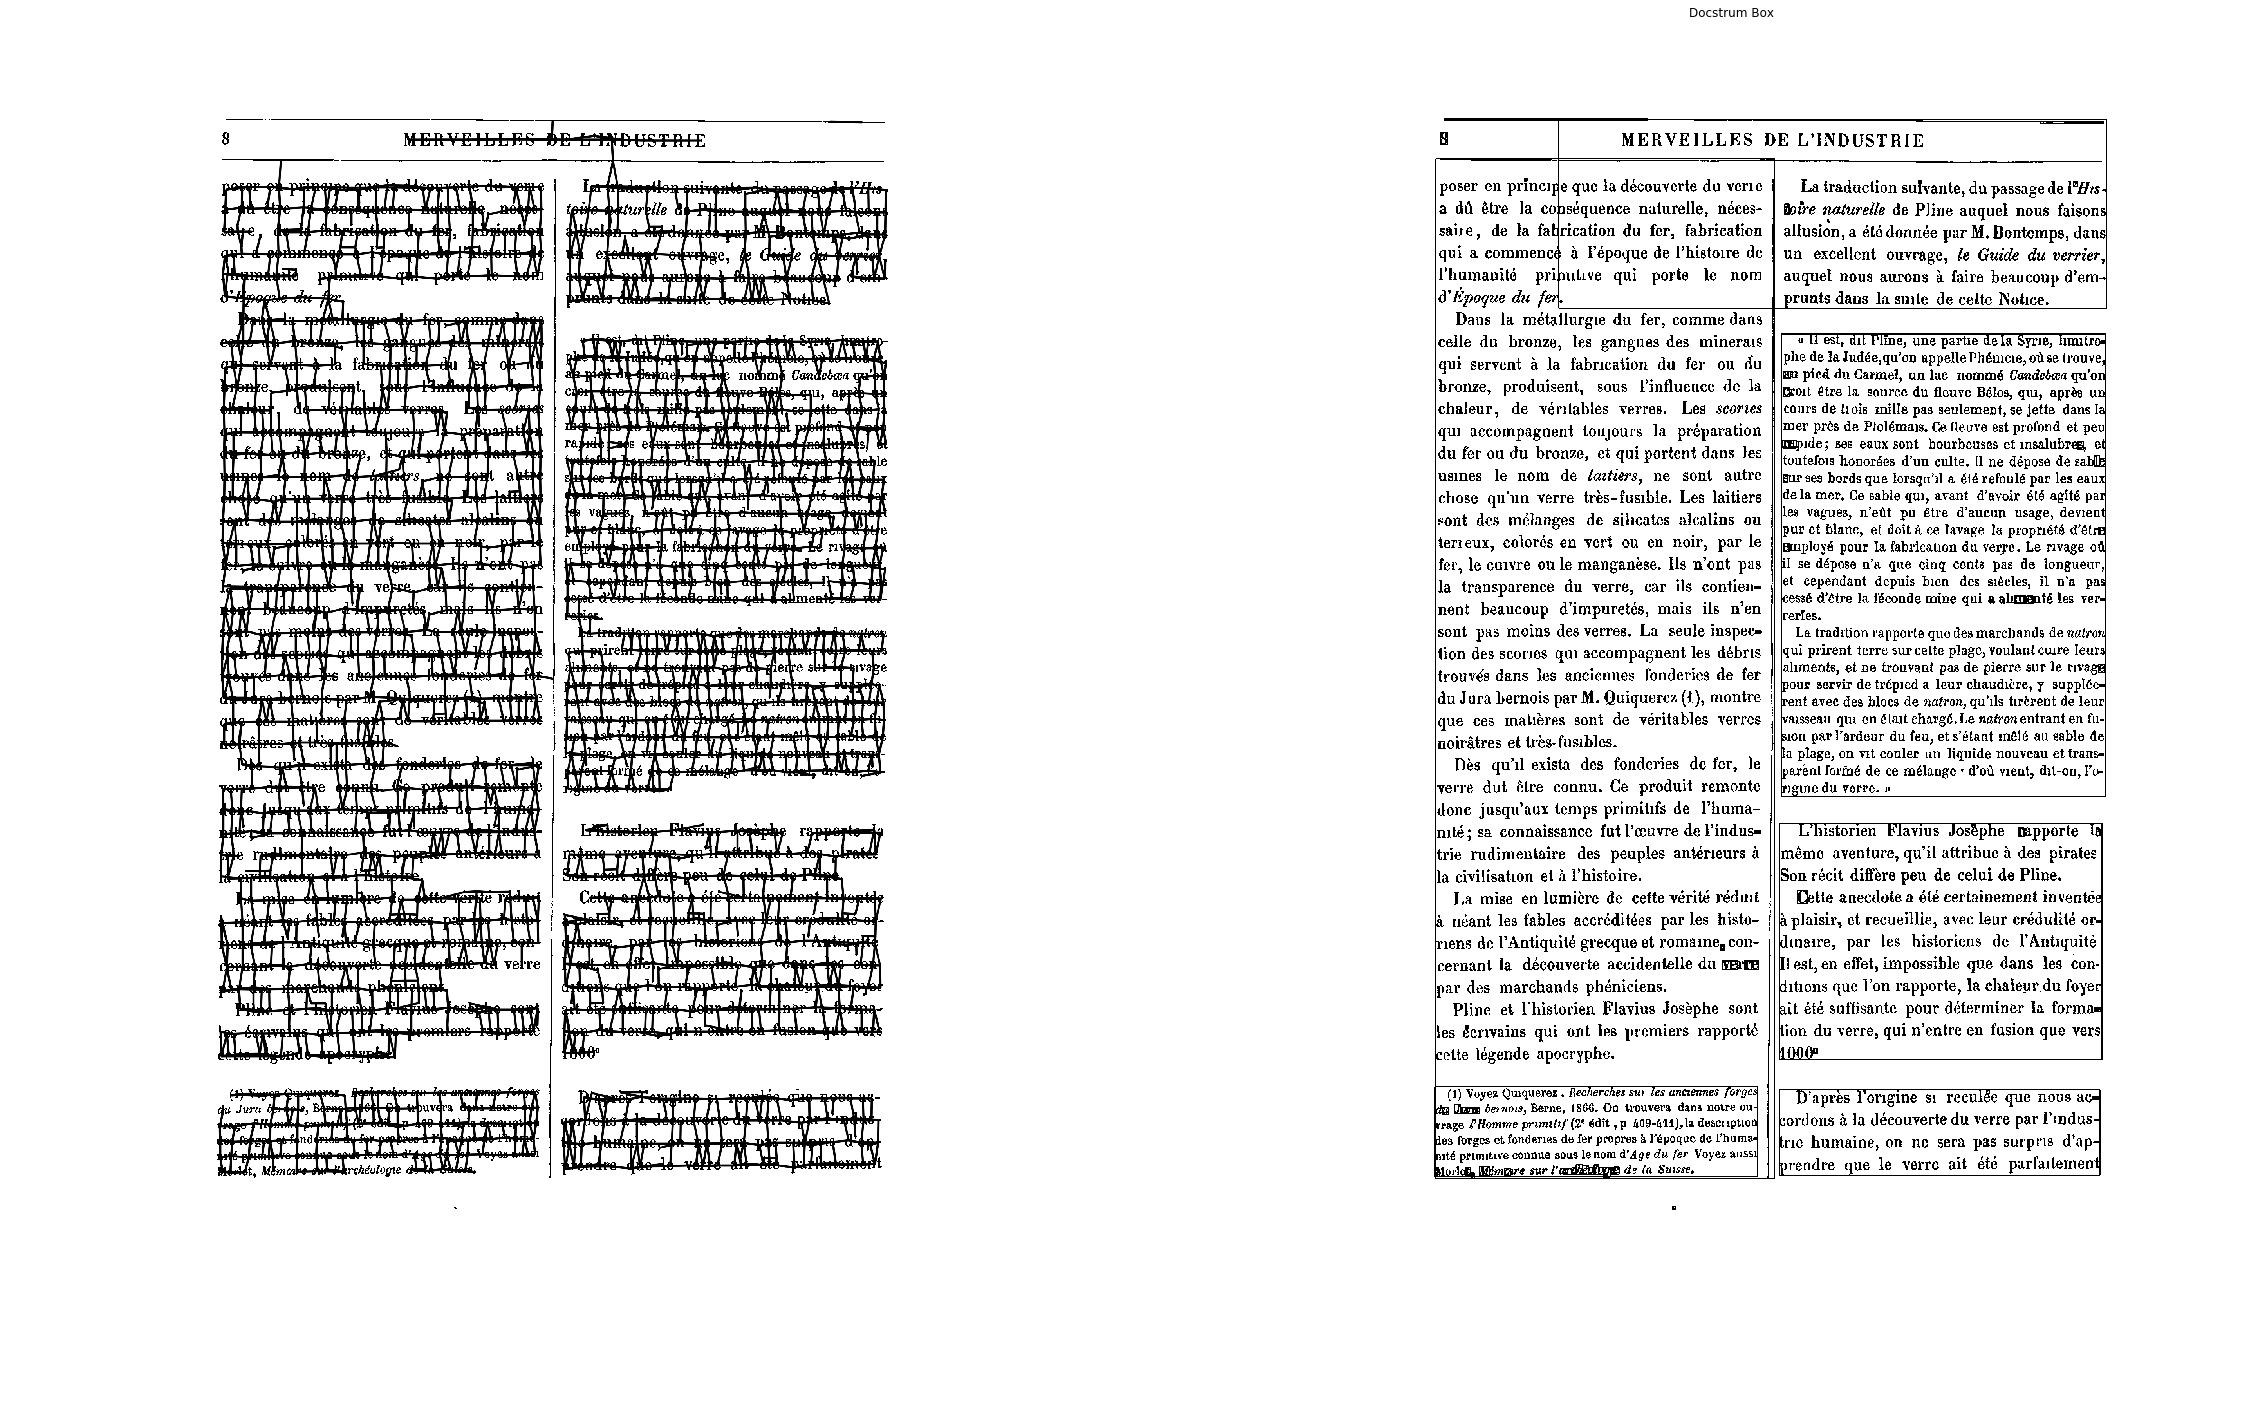

In [18]:
from Progetto import *
import cv2
from matplotlib import pyplot as plt

img_name='prova2.tif'
path='images/'+img_name
img = cv2.imread(path)
#img_or1=img.copy()
#img_or2=img.copy()

img_bin = binarization('otsu', img)
img_bin=removeFiguresOrSpots(img_bin,'spots')
img_or1=img_bin.copy()
img_or2=img_bin.copy()
img_b1=img_bin.copy()
img_b2=img_bin.copy()

printContours(img_b1,img_b1, 1)
points = findCentroids(img_b1,img_b1)

Graph = kNeighborsGraph(points,5)
k_kneighbors_edges = np.array(Graph.nonzero()).T
k_kneighbors_distances = Graph.data

points = np.int32(points)
horizontal_edges, vertical_edges = edgesInformation(k_kneighbors_edges, points, k_kneighbors_distances)

#DOCSTRUM ORIZZONTALE
docstrum(img, img_b2, horizontal_edges, points, max(k_kneighbors_distances)/2)

rlsa_docstrum = rlsa(img_b2.copy(), True ,False, 2)

printContours(rlsa_docstrum, img_or1, 2)

plt.figure(figsize=(40,40))
plt.subplot(1,2,1),plt.imshow(img_b2,'gray')
plt.title(''), plt.axis('off') 
plt.subplot(1,2,2),plt.imshow(img_or1,'gray')
plt.title('Docstrum Lines'), plt.axis('off')
plt.show()

#DOCSTRUM VERTICALE
docstrum(img, img_b2, vertical_edges, points, max(k_kneighbors_distances)/2)

rlsa_docstrum = rlsa(img_b2.copy(), False , True, 1)

printContours(rlsa_docstrum, img_or2, 2)

plt.figure(figsize=(40,40))
plt.subplot(1,2,1),plt.imshow(img_b2,'gray')
plt.title(''), plt.axis('off') 
plt.subplot(1,2,2),plt.imshow(img_or2,'gray')
plt.title('Docstrum Box'), plt.axis('off')
plt.show()

### Voronoi

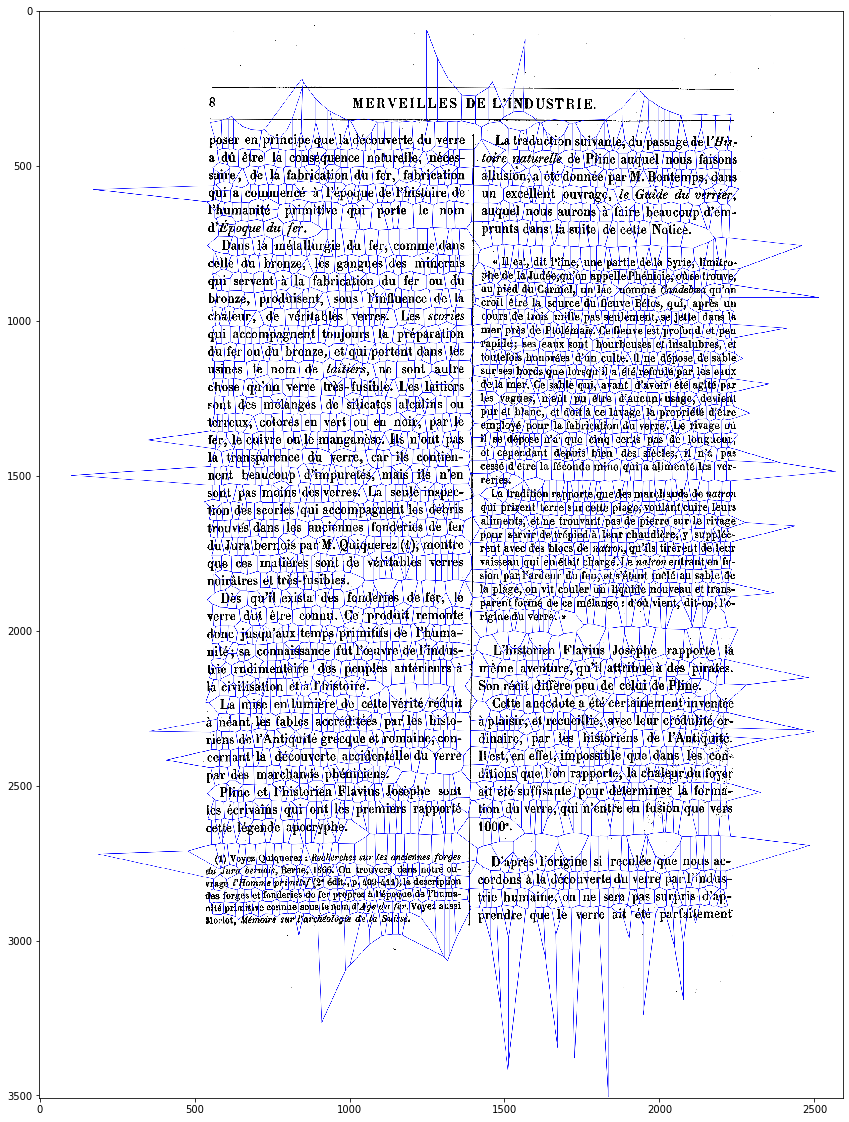

In [17]:
from Progetto import *
import cv2
from matplotlib import pyplot as plt

img_name='prova2.tif'
path='images/'+img_name
img = cv2.imread(path)

img_bin = binarization('otsu', img)
img_bin=removeFiguresOrSpots(img_bin,'spots')

printContours(img_bin,img_bin,1)
points = findCentroids(img_bin,img_bin)

_, img_voronoi = voronoi(points, img)
plt.figure(figsize=(20,20))
plt.imshow(img_voronoi,'gray')
plt.show()



## Top-Down methods 
### XY Tree

La pagina è splittata in colonne, paragrafi, linee di testo, parole e infine caratteri.

Tramite le proiezioni faccio un taglio 

Name: A


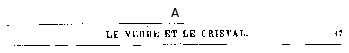

Name: B


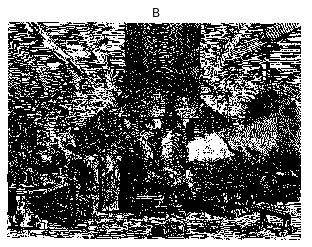

Name: C


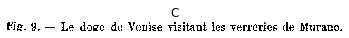

Name: D


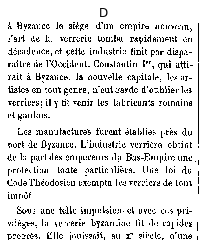

Name: E


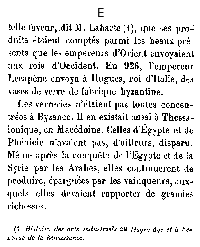

IGRAPH U--- 7 6 --
+ edges:
0--1 0--2 0--3 0--4 4--5 4--6


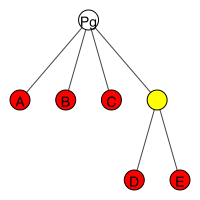

In [16]:
from Progetto import *
import cv2
from matplotlib import pyplot as plt
from igraph import Graph, EdgeSeq

img_name='prova1.tif'
pathXY='images/XY_Tree'
path='images/'+img_name
img = cv2.imread(path)
img_bin = binarization('otsu',img)

info=cutImage(img_bin,50,40)
infoV=cutImage(img_bin,50,21,True)
XY_Tree = Graph()
XY_Tree, typeNode, label=cutMatrix(img_name, pathXY, img_bin, info, infoV, XY_Tree)

XY_Tree.vs["type"] = typeNode
XY_Tree.vs["label"] = label
color_dict = {"root": "white", "leaf": "red", "node": "yellow"}
XY_Tree.vs["color"] = [color_dict[type] for type in XY_Tree.vs["type"]]

layout = XY_Tree.layout_reingold_tilford(mode="in", root=0)
igraph.plot(XY_Tree, layout = layout, bbox = (200, 200), margin = 20)
#out.save('Tree.png')

# Text Recognition
## Pytesseract

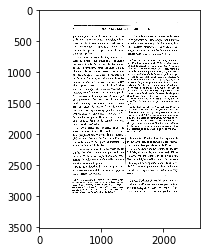

8 MERVEILLES DE L’INDUSTRIE.

 

poser en principe que la découverte du verre

a du étre la conséquence naturelle, néces-
saire, de la fabrication du fer, fabrication

qui a commencé a l’époque de Vhistoire de
primitive qui porte le nom

Phumanité
d’ Epoque du fer.

Dans la métallurgie du fer, comme dans
celle du bronze, les gangues des minerais
qui servent A la fabrication du fer ou du
bronze, produisent, sous l’influence de la
chaleur, de véritables verres. Les scories
qui accompagnent toujours la préparation
du fer ou du bronze, et qui portent dans les
usines le nom de /attiers, ne sont autre

chose qu'un verre trés-fusible. Les laitiers

sont des mélanges de silicates alcalins ou

terreux, colorés en vert ou en noir, par le

fer, le cuivre ou le manganése. [ls n’ont pas
la transparence du verre, car ils contien-
nent beaucoup d’impuretés, mais ils n’en
sont pas moins des verres. La seule inspec-
tion des scories qui accompagnent les débris
trouvés dans les anciennes fonderies de fe

In [8]:
from PIL import Image
import pytesseract
import argparse
#import os

f = open('SaveText.txt','w')
img_name='image02.tif'
path='images/'+img_name
img = cv2.imread(path)
text = pytesseract.image_to_string(Image.open(path))
plt.imshow(img,'gray')
plt.show()
print(text)
f.write(text)
f.close()